In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# read in the data
# we will go over these blocks of code
# in a few weeks
raw_housing_prices = open('housing-prices.txt','r').readlines()

# extract column names and create
# a list of lists for the data
# and a dictionary of lists for the data
header = raw_housing_prices[0].split('\t')
housing_prices_list = []
housing_prices_dict = {}
for line in raw_housing_prices[1:]:
    datum = [float(a) for a in line.split('\t')]
    housing_prices_list.append(datum)
    for i,a in enumerate(header):
        if a not in housing_prices_dict:
            housing_prices_dict[a] = []
        housing_prices_dict[a].append(datum[i])
print header

['Price', 'Living.Area', 'Bedrooms', 'Bathrooms', 'Fireplaces', 'Age\n']


In [29]:
# organize data into a format that is manageable for plots and anova

# make dictionary 
dict_by_bed = {}
# go through set of bedrooms
for bed in set(housing_prices_dict['Bedrooms']):
    # create a new key for each number of bedrooms
    dict_by_bed[bed] = []

    
# for each house prices
for i,price in enumerate(housing_prices_dict['Price']):
    # append the price to the dictionary by number of bedrooms
    dict_by_bed[housing_prices_dict['Bedrooms'][i]].append(price)
    
# create an empty list to add data
data = []
labels = []
for bed in sorted(dict_by_bed, reverse=True):
    labels.append(str(bed) + ' Bed')
    data.append(dict_by_bed[bed])

print labels

['5.0 Bed', '4.0 Bed', '3.0 Bed', '2.0 Bed', '1.0 Bed']


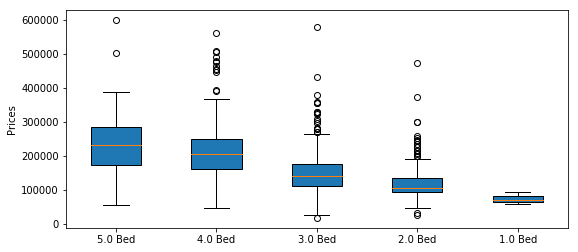

In [30]:
# draw a boxplot displaying the house prices (y-axis)
# by number of bedrooms (x-axis)

# create figure object
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
bplot1 = axes.boxplot(data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(data))],
         xticklabels=labels)

# add y-axis label
axes.set_ylabel('Prices')

plt.show()

In [19]:
range(len(data))

[0, 1, 2, 3, 4]

In [33]:
# Run an anova analysis on the data previously plotted

from scipy import stats
 
F, p = stats.f_oneway(data[0], data[1], data[2], data[3], data[4])

In [39]:
print "F-statistic: %.2f\np-value: %.2e"%(F,p)

F-statistic: 77.03
p-value: 2.50e-57


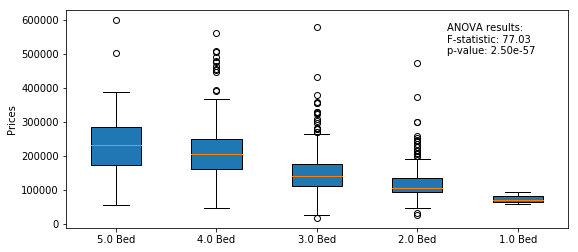

In [47]:
# draw a boxplot displaying the house prices (y-axis)
# by number of bedrooms (x-axis)
# include the results of the ANOVA analysis

# create figure object
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
bplot1 = axes.boxplot(data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(data))],
         xticklabels=labels)

# add y-axis label
axes.set_ylabel('Prices')

# add results from anova analysis
plt.text(4.3, 500000, "ANOVA results:\nF-statistic: %.2f\np-value: %.2e"%(F,p))

plt.show()